In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2
from marcia import Cosmology
from marcia import Data
from marcia import Likelihood
from marcia import Sampler
from marcia import Kernels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Validate Cosmology

In [5]:
cParIni = [70.0, 0.3] 
params = ['H0','Omega_m']

theory = Cosmology('LCDM',params)

z_min = 0.001
z_max = 10.0

In [7]:
theory.hubble_rate(cParIni,zlist)

array([  70.03153638,  131.47733083,  229.5426088 ,  351.06529573,
        491.02397774,  646.85808407,  816.93763436, 1000.09137079,
       1195.41653112, 1402.18563019])

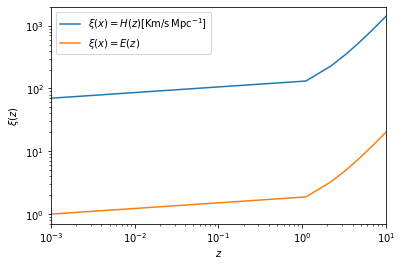

In [6]:
zlist = np.linspace(z_min, z_max, 10)

plt.xlim(z_min,z_max)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\xi(z)$')

plt.plot(zlist, theory.hubble_rate(cParIni,zlist), label = r'$\xi(x) = H(z) [\rm{Km/s\, Mpc^{-1}}]$')
plt.plot(zlist, theory.hubble_rate(cParIni,zlist)/theory.param(cParIni).H0, label = r'$\xi(x) = E(z)$')

plt.gca().legend()

In [8]:
theory.transverse_distance(cParIni,zlist)

array([   0.        , 3563.00252552, 5480.86846219, 6652.2955333 ,
       7453.46122345, 8043.88164985, 8501.73372259, 8870.0167495 ,
       9174.50291195, 9431.67380384])

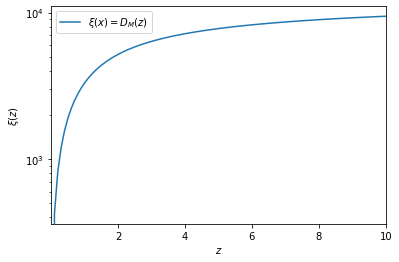

In [6]:
plt.xlim(z_min,z_max)
plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$\xi(z)$')

plt.plot(zlist, theory.transverse_distance(cParIni,zlist), label = r'$\xi(x) = D_M(z)$')

plt.gca().legend()

In [7]:
# SOund horizon for the  current cosmology 
print('The sound horizon in MPc is : ' + str(round(theory.sound_horizon(cParIni), 2)))

The sound horizon in MPc is : 146.61


In [8]:
w_param = ['w0','wa']
test = Cosmology('wCDM',w_param)

AssertionError: wCDM: w is not defined in the parameters